# RQ3

How does the embedding model influence resource and energy use?

In [42]:
%load_ext autoreload
%autoreload 2

import copy
import pandas as pd
from results_processor import get_experiments_data, compute_total_energy_per_run, get_variation_runs_data, compute_kruskal_wallis

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
experiments_data = get_experiments_data(
    "rq3",
    ["Total DRAM Power [W]", "IA Cores Power [W]", "GPU Rail Powers (avg) [W]"],
)

runs_data = compute_total_energy_per_run(experiments_data)

In [50]:
embedding_variation_runs = []

for embedding_model_name, data in runs_data.items():
    data_embedding_variation = copy.deepcopy(data["measurements_per_run"])
    data_embedding_variation["duration"] = data["durations_per_run"]
    data_embedding_variation["embedding_model"] = embedding_model_name.replace(
        "_nfcorpus", ""
    ).replace("_", "-")

    embedding_variation_runs.append(data_embedding_variation)

embedding_variation_runs = pd.concat(embedding_variation_runs)

In [45]:
embedding_variation_runs.groupby("embedding_model").mean()

,IA Cores Energy [J],DRAM Energy [J],GPU Energy [J],duration
embedding_model,,,,
gte-base,1549.46147,150.71270,7232.05916,242.305867
gte-large,3960.83026,374.25735,17926.52176,621.284805
gte-small,647.81286,63.64147,2183.68123,89.624836


In [51]:
embedding_variation_runs.groupby("embedding_model").std()

,IA Cores Energy [J],DRAM Energy [J],GPU Energy [J],duration
embedding_model,,,,
gte-base,8.886426,0.799858,37.291625,0.601396
gte-large,177.030433,7.342029,36.122263,0.604015
gte-small,4.345837,0.480859,19.425145,0.143353


In [74]:
def get_dev(values):
    return round(1.96 * values.std() / len(values), 2)

In [77]:
embedding_variation_runs.groupby("embedding_model").aggregate(
    lambda x: str(round(x.mean(), 2)) + " +- " + str(get_dev(x))
)

,IA Cores Energy [J],DRAM Energy [J],GPU Energy [J],duration
embedding_model,,,,
gte-base,1549.46 +- 1.74,150.71 +- 0.16,7232.06 +- 7.31,242.31 +- 0.12
gte-large,3960.83 +- 34.7,374.26 +- 1.44,17926.52 +- 7.08,621.28 +- 0.12
gte-small,647.81 +- 0.85,63.64 +- 0.09,2183.68 +- 3.81,89.62 +- 0.03


<Axes: ylabel='Frequency'>

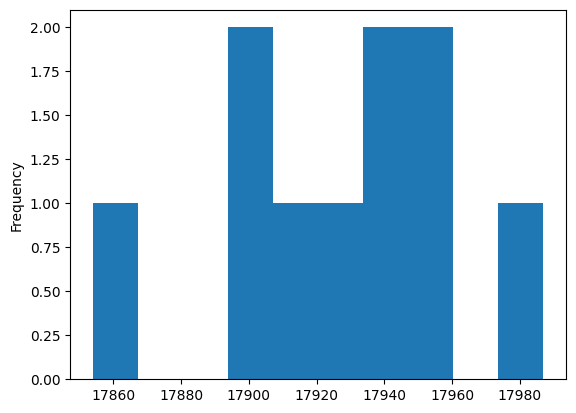

In [49]:
embedding_variation_runs[embedding_variation_runs["embedding_model"] == "gte-large"][
    "GPU Energy [J]"
].plot(kind="hist")